In [17]:
import pandas as pd

analytics = pd.read_csv('Deaths Observation Analysis.csv') # read analytics sheet

analytics['Timestamp'] = pd.to_datetime(analytics['Timestamp']) # convert to datetime for sorting

sessions = analytics.groupby('sessionID') # group analytics data by session ID, to collect data by session
levelJumps = [] # levelJumps will hold the number of jumps for each level for each session
levelJumps.append([]) # start with empty arrays for levels 1-3
levelJumps.append([])
levelJumps.append([])
for session_id, session_data in sessions: # loop through each of the grouped sessions...
    # make sure the timestamps within a session are sorted correctly
    sorted_session_data = session_data.sort_values(by='Timestamp')
    jumps = [0,0,0] # initialize counter for number of jump datapoints for the session per-level
    for i, r in sorted_session_data.iterrows(): # iterate through each row in the current session's data
        if r['activity'] == 'Jump - Level1': # increment counter when seeing a jump for each level
            jumps[0] += 1
        if r['activity'] == 'Jump - Level2':
            jumps[1] += 1
        if r['activity'] == 'Jump - Level3':
            jumps[2] += 1
    levelJumps[0].append(jumps[0]) # then add the final jump counter for the session per-level to levelJumps array
    levelJumps[1].append(jumps[1])
    levelJumps[2].append(jumps[2])

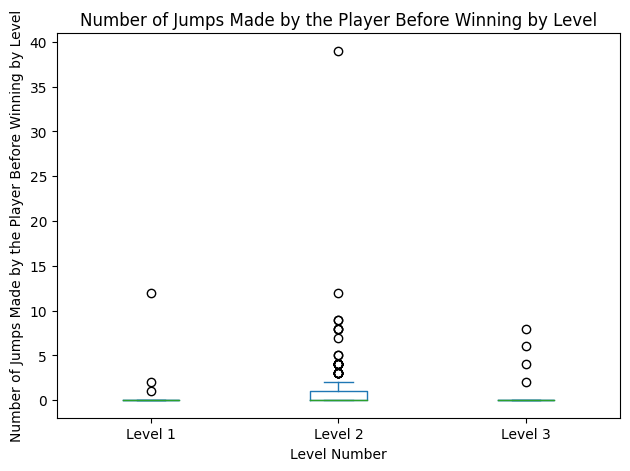

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

dictionarry = { # create a boxplot using each level's data
    'Level 1': levelJumps[0],
    'Level 2': levelJumps[1],
    'Level 3': levelJumps[2]

}
df = pd.DataFrame(dictionarry)

df.plot(kind="box", title="Number of Jumps Made by the Player Before Winning by Level")
plt.xlabel("Level Number")
plt.ylabel('Number of Jumps Made by the Player Before Winning by Level')
plt.tight_layout()
plt.show()

In [24]:
levelDeaths = [] # levelDeaths will hold the number of deaths for each level for each session
levelDeaths.append([]) # start with empty arrays for levels 1-3
levelDeaths.append([])
levelDeaths.append([])
for session_id, session_data in sessions: # loop through each of the grouped sessions...
    # make sure the timestamps within a session are sorted correctly
    sorted_session_data = session_data.sort_values(by='Timestamp')
    deaths = [0,0,0] # initialize counter for number of death datapoints for the session per-level
    for i, r in sorted_session_data.iterrows(): # iterate through each row in the current session's data
        if r['activity'] == 'Died (Spikes) - Level1' or r['activity'] == 'Died (Enemy) - Level1': # increment counter when seeing a death for each level
            deaths[0] += 1
        if r['activity'] == 'Died (Spikes) - Level2' or r['activity'] == 'Died (Enemy) - Level2':
            deaths[1] += 1
        if r['activity'] == 'Died (Spikes) - Level2' or r['activity'] == 'Died (Enemy) - Level2':
            deaths[2] += 1
    levelDeaths[0].append(deaths[0]) # then add the final jump counter for the session per-level to levelJumps array
    levelDeaths[1].append(deaths[1])
    levelDeaths[2].append(deaths[2])
    print(levelDeaths)

[[0], [1], [1]]
[[0, 0], [1, 0], [1, 0]]
[[0, 0, 0], [1, 0, 0], [1, 0, 0]]
[[0, 0, 0, 0], [1, 0, 0, 3], [1, 0, 0, 3]]
[[0, 0, 0, 0, 0], [1, 0, 0, 3, 0], [1, 0, 0, 3, 0]]
[[0, 0, 0, 0, 0, 0], [1, 0, 0, 3, 0, 11], [1, 0, 0, 3, 0, 11]]
[[0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 3, 0, 11, 1], [1, 0, 0, 3, 0, 11, 1]]
[[0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 3, 0, 11, 1, 4], [1, 0, 0, 3, 0, 11, 1, 4]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 3, 0, 11, 1, 4, 0], [1, 0, 0, 3, 0, 11, 1, 4, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 3, 0, 11, 1, 4, 0, 1], [1, 0, 0, 3, 0, 11, 1, 4, 0, 1]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 3, 0, 11, 1, 4, 0, 1, 1], [1, 0, 0, 3, 0, 11, 1, 4, 0, 1, 1]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 3, 0, 11, 1, 4, 0, 1, 1, 1], [1, 0, 0, 3, 0, 11, 1, 4, 0, 1, 1, 1]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 3, 0, 11, 1, 4, 0, 1, 1, 1, 1], [1, 0, 0, 3, 0, 11, 1, 4, 0, 1, 1, 1, 1]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 3, 0, 11, 1, 4, 0, 

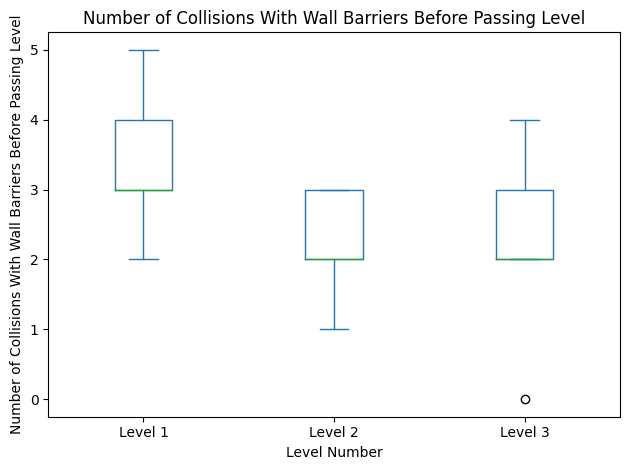

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

dictionarry = {
    'Level 1': [2,3,5,4,3],
    'Level 2': [1,2,3,2,3],
    'Level 3': [2,3,4,2,0]

}
df = pd.DataFrame(dictionarry)

df.plot(kind="box", title="Number of Collisions With Wall Barriers Before Passing Level")
plt.xlabel("Level Number")
plt.ylabel('Number of Collisions With Wall Barriers Before Passing Level')
plt.tight_layout()
plt.show()

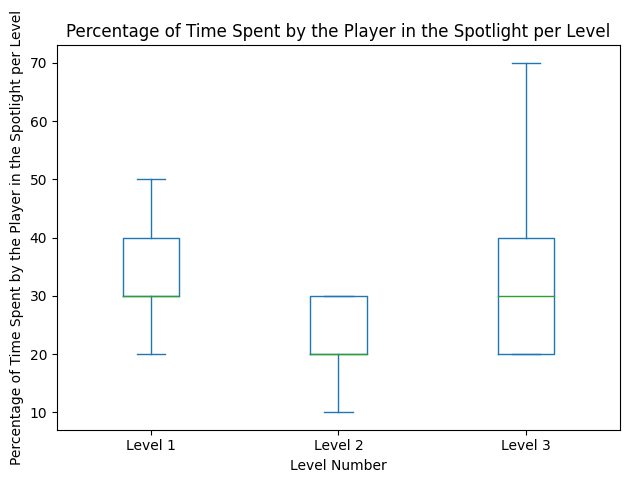

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

dictionarry = {
    'Level 1': [20,30,50,40,30],
    'Level 2': [10,20,30,20,30],
    'Level 3': [20,30,40,20,70]

}
df = pd.DataFrame(dictionarry)

df.plot(kind="box", title="Percentage of Time Spent by the Player in the Spotlight per Level")
plt.xlabel("Level Number")
plt.ylabel('Percentage of Time Spent by the Player in the Spotlight per Level')
plt.tight_layout()
plt.show()

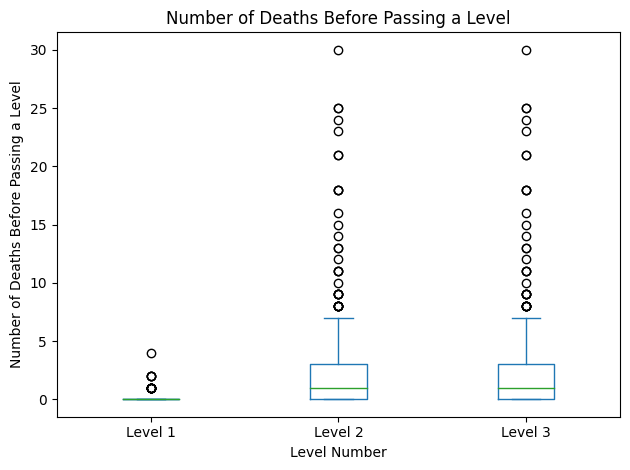

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

dictionarry = {
    'Level 1': levelDeaths[0], # use levelDeaths data parsed above for our dataset
    'Level 2': levelDeaths[1],
    'Level 3': levelDeaths[2]

}
df = pd.DataFrame(dictionarry)

df.plot(kind="box", title="Number of Deaths Before Passing a Level")
plt.xlabel("Level Number")
plt.ylabel('Number of Deaths Before Passing a Level')
plt.tight_layout()
plt.show()